# IBM Developer Skills Network

# Support Vector Machine vs Vanilla Linear Classifier

In [1]:
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
digits = datasets.load_digits()
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images), -1))

# Visualize some handwritten Images in the Dataset

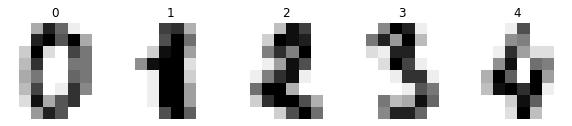

In [3]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

# Divide Images into Training and Test Set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(flatten_digits, target, test_size=0.2)

# Hand-written classification with Logistic Regression

In [5]:
# Standardize the dataset
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

Create the logistic regression and fit the logistic regression and use the l1 penalty. Note here that since this is a multiclass problem the Logistic Regression parameter multi_class is set to multinomial.

In [6]:
logit = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

In [7]:
logit.fit(X_train_logistic, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [8]:
y_pred_logistic = logit.predict(X_test_logistic)

In [9]:
# Get the accuracy
print("Accuracy: "+str(logit.score(X_test_logistic, y_test))) # 75%

Accuracy: 0.7583333333333333


In [10]:
# Confusion matrix
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

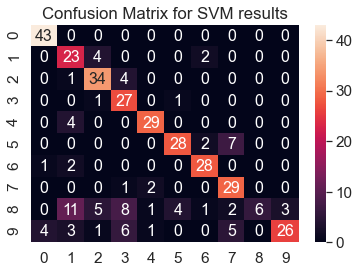

In [11]:
df_cm = pd.DataFrame(cmx)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

# Hand-Written Classification with SVM

In [12]:
# Create the model
svm_classifier = svm.SVC(gamma='scale')
svm_classifier.fit(X_train, y_train)

SVC()

In [13]:
# Predict for the test set
y_pred_svm = svm_classifier.predict(X_test)

In [14]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm))) # 98.6% !

Accuracy: 0.9861111111111112


In [15]:
# Confusion matrix
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)

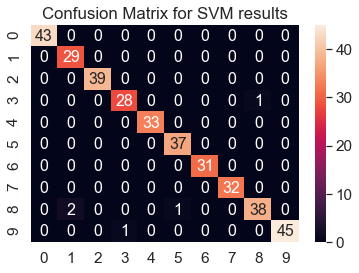

In [16]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

# Comparing SVM & Logistic Regression with K-Fold Cross Validation

k-fold Cross validation is used when there are limited samples, the handwritten dataset contains about 1800 samples, this will give an opportunity for all the data to be in the training and test set at different given times. We will add l2 regularization to visualize how well they both do against SVM.

In [18]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


results = []
names = []
y = digits.target
for name, algo in algorithm:
    k_fold = model_selection.KFold(n_splits=10, random_state=10, shuffle=True)
    if name == 'SVM':
        X = flatten_digits
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flatten_digits)
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
        
    results.append(cv_results)
    names.append(name)

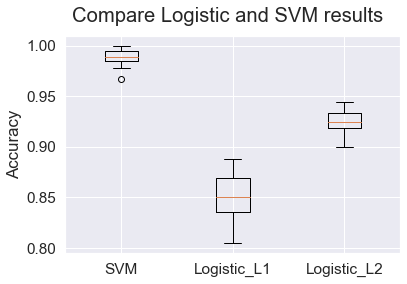

In [19]:
# SVM always performs better than Logistic regression
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()